# hw5: ATAC-Seq and ArchR

## Load libraries and configure settings

In [1]:
library('ArchR');


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
addArchRGenome("mm10");

Setting default genome to Mm10.



## Create or load ArchRProject

**NOTE:** Please set the `projDir` in the cell below.

In [3]:
# IMPORTANT: please set the projDir to be under your project directory for this class,
# e.g. /ocean/projects/bio240054p/<your PSC username>/mouseBrainAtacOut
# this should be the same as $PROJECT/mouseBrainAtacOut
projDir <- "/ocean/projects/bio240054p/sbajpai/mouseBrainAtacOut"

if (dir.exists(projDir)) {
    # Load the existing ArchRProject
    mouseBrainArchproj <- loadArchRProject(path = projDir, force = FALSE, showLogo = FALSE)
} else {
    #Set the directory and read in the arrow files
    # We are going to skip some samples for computational efficiency
    mouseBrainAtacDir <- "/ocean/projects/bio240054p/csestili/data/Multiome_RNA_ATAC_Mouse_Brain_Alzheimers/arrows/";
    mouseBrainArrowFilesV <- c(
        paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_1.arrow",sep=""),
        paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_2.arrow",sep=""),
        paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_3.arrow",sep=""),
        paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_4.arrow",sep=""),
        #paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_5.arrow",sep=""),
        #paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_6.arrow",sep=""),
        paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_7.arrow",sep=""),
        paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_8.arrow",sep=""),
        paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_9.arrow",sep=""),
        paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_10.arrow",sep=""),
        paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_11.arrow",sep=""),
        paste(mouseBrainAtacDir,"Multiome_Mouse_Brain_Alzheimers_12.arrow",sep="")
    )

    # Create the ArchRProject
    mouseBrainArchproj <- ArchRProject(
      ArrowFiles = mouseBrainArrowFilesV,
      outputDirectory = projDir,
      copyArrows = TRUE, #This is recommended so that you maintain an unaltered copy for later usage.
      showLogo = FALSE
    )

    # Save the ArchRProject
    mouseBrainArchproj <- saveArchRProject(ArchRProj = mouseBrainArchproj)
}

Successfully loaded ArchRProject!



In [4]:
getAvailableMatrices(mouseBrainArchproj)

[1] "GeneScoreMatrix" "TileMatrix"

## Examine the data

### Reduce Dimensionality with Iterative LSI

In [7]:
#Reduce Dimensionality
mouseBrainArchproj <- addIterativeLSI(ArchRProj = mouseBrainArchproj, useMatrix = "TileMatrix", name = "IterativeLSI")

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-1851a157d5f42-Date-2024-10-28_Time-22-23-21.919631.log
If there is an issue, please report to github with logFile!

2024-10-28 22:23:22.405959 : Computing Total Across All Features, 0.004 mins elapsed.

2024-10-28 22:23:24.558738 : Computing Top Features, 0.04 mins elapsed.

###########
2024-10-28 22:23:26.689528 : Running LSI (1 of 2) on Top Features, 0.076 mins elapsed.
###########

2024-10-28 22:23:26.729365 : Sampling Cells (N = 10006) for Estimated LSI, 0.076 mins elapsed.

2024-10-28 22:23:26.733555 : Creating Sampled Partial Matrix, 0.077 mins elapsed.

2024-10-28 22:23:47.417871 : Computing Estimated LSI (projectAll = FALSE), 0.421 mins elapsed.

2024-10-28 22:24:41.499752 : Identifying Clusters, 1.323 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
2024-10-28 22:25:01.954436 : Identified 6 Clusters, 1.664 mins elapsed.

2024-10-28 22:25:01.964739 : Saving LSI Iteration, 1.6


************************************************************
2024-10-28 22:25:32.720386 : ERROR Found in .saveIteration for  
LogFile = ArchRLogs/ArchR-addIterativeLSI-1851a157d5f42-Date-2024-10-28_Time-22-23-21.919631.log

<simpleError in g$grobs[[legend]]: no such index at level 2
>

************************************************************



2024-10-28 22:25:32.723531 : Creating Cluster Matrix on the total Group Features, 2.176 mins elapsed.

2024-10-28 22:26:44.657481 : Computing Variable Features, 3.375 mins elapsed.

###########
2024-10-28 22:26:44.862033 : Running LSI (2 of 2) on Variable Features, 3.379 mins elapsed.
###########

2024-10-28 22:26:44.88934 : Creating Partial Matrix, 3.379 mins elapsed.

2024-10-28 22:27:32.633588 : Computing LSI, 4.175 mins elapsed.

2024-10-28 22:28:34.908938 : Finished Running IterativeLSI, 5.213 mins elapsed.



In [8]:
head(getReducedDims(mouseBrainArchproj))

,LSI1,LSI2,LSI3,LSI4,LSI5,LSI6,LSI7,LSI8,LSI9,LSI10,⋯,LSI21,LSI22,LSI23,LSI24,LSI25,LSI26,LSI27,LSI28,LSI29,LSI30
Multiome_Mouse_Brain_Alzheimers_1#CGTGGTTCATAATTGC-1,5.038220,-0.4785554,-1.11596466,0.4836219,-0.7647358,-0.7944428,-0.28827296,0.2115392,0.26988748,-0.1533048,⋯,-0.08551143,-0.1892493,-0.08043208,-0.09370973,-0.1140634,-0.13377509,-0.10680017,-0.09396627,-0.08659235,-0.13415105
Multiome_Mouse_Brain_Alzheimers_1#GCCCATAAGTCAATTG-1,5.145817,0.8763126,-0.13796510,-0.4611850,-0.2190951,-0.4453226,-0.20636269,-0.1677002,-0.02004788,-0.4138086,⋯,-0.03083221,-0.2414919,-0.29415636,-0.36852802,-0.2035310,-0.20803430,-0.10210827,-0.08568990,-0.18953017,-0.12842056
Multiome_Mouse_Brain_Alzheimers_1#GGTTACCCAAACCTAT-1,5.129812,0.8367121,-0.02519705,-0.3936355,-0.4036065,-0.6595537,-0.12952164,-0.2002975,0.04201478,-0.5834751,⋯,-0.25327578,-0.1955283,-0.17823373,-0.18527063,-0.2310761,-0.30736362,-0.09437998,-0.10330270,-0.10206932,-0.17257162
Multiome_Mouse_Brain_Alzheimers_1#GACAATACAGTAGGAT-1,5.142765,0.7981849,-0.06175664,-0.5045447,-0.2816750,-0.5686345,-0.25119730,-0.2299281,0.09624384,-0.4661299,⋯,-0.06493804,-0.2149242,-0.24079012,-0.26662479,-0.1478956,-0.06002680,-0.21240413,-0.17325191,-0.17092851,-0.19330961
Multiome_Mouse_Brain_Alzheimers_1#TTTCACCCAAAGCTAA-1,5.065889,0.6064438,-0.13344689,-0.3863407,-0.4220445,-0.5521576,0.06861624,-0.3152628,0.10837269,-0.8238634,⋯,-0.38597188,-0.2047276,0.27613104,-0.44740821,-0.1155006,-0.42626213,-0.06894754,-0.23276913,-0.19211360,0.10386921
Multiome_Mouse_Brain_Alzheimers_1#TGGTTCCTCATTTGTC-1,5.170255,0.7242977,-0.14285445,-0.2734641,-0.2618933,-0.6751797,-0.25893513,-0.3225307,-0.14859256,-0.2636103,⋯,0.01409882,-0.2050108,-0.21482275,-0.31303991,-0.1413603,-0.08662386,-0.23225532,-0.17493681,-0.01511622,-0.07939444


### Clustering and UMAP visualization

ArchR logging to : ArchRLogs/ArchR-addClusters-1851a3a2bef22-Date-2024-10-28_Time-22-31-29.062132.log
If there is an issue, please report to github with logFile!

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
22:32:32 Creating temp model dir /var/tmp/RtmpUKiHl0/dir1851a6292610d

22:32:32 Creating dir /var/tmp/RtmpUKiHl0/dir1851a6292610d

22:32:35 Changing to /var/tmp/RtmpUKiHl0/dir1851a6292610d

22:32:35 Creating /ocean/projects/bio240054p/sbajpai/mouseBrainAtacOut/Embeddings/Save-Uwot-UMAP-Params-IterativeLSI-1851a2a41bb25-Date-2024-10-28_Time-22-32-32.865379.tar

Warning message:
“invalid uid value replaced by that for user 'nobody'”
ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1851a2ee30eff-Date-2024-10-28_Time-22-32-36.824145.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1851a2ee30eff-Date-2024-10-28_Time-22-

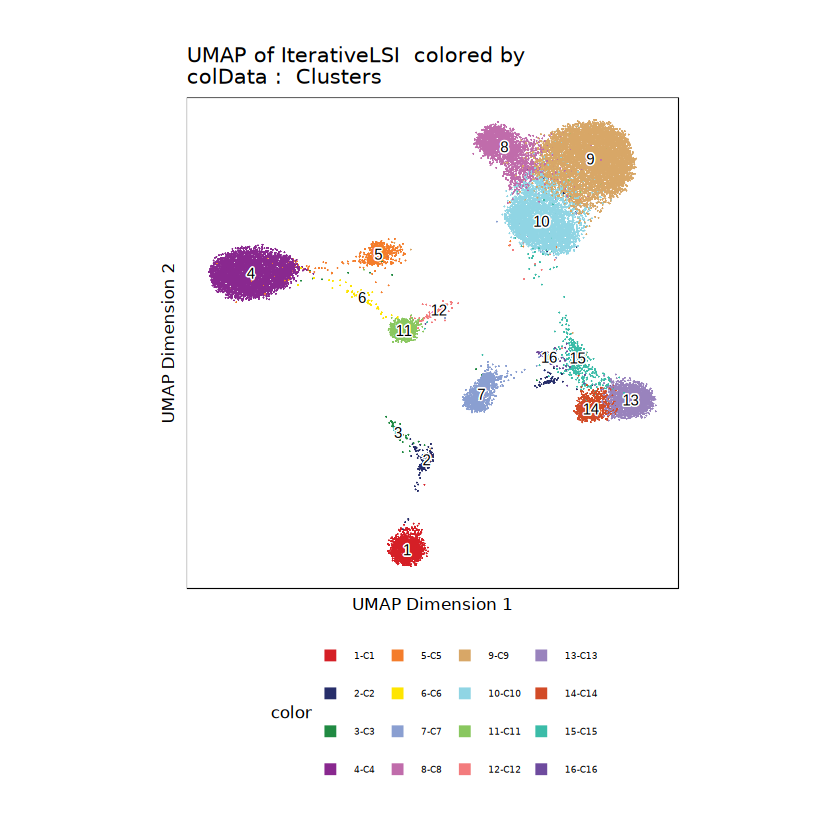

In [9]:
#Add clusters using graph-based clustering
mouseBrainArchproj <- addClusters(input = mouseBrainArchproj, reducedDims = "IterativeLSI", verbose = FALSE, force = TRUE)
#Create UMAP plot for visualization
mouseBrainArchproj <- addUMAP(ArchRProj = mouseBrainArchproj, reducedDims = "IterativeLSI", verbose = FALSE, force = TRUE)
plotEmbedding(ArchRProj = mouseBrainArchproj, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")

### Imputation

In [10]:
#Impute missing data using magic - somewhat controversial
mouseBrainArchproj <- addImputeWeights(mouseBrainArchproj)
mouseBrainArchproj <- saveArchRProject(ArchRProj = mouseBrainArchproj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-1851a69005384-Date-2024-10-28_Time-22-37-28.648918.log
If there is an issue, please report to github with logFile!

2024-10-28 22:37:28.73735 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
     

### Investigate effect of imputation

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1851a72508729-Date-2024-10-28_Time-22-38-29.506226.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-10-28 22:38:29.687843 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 


Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1851a72508729-Date-2024-10-28_Time-22-38-29.506226.log



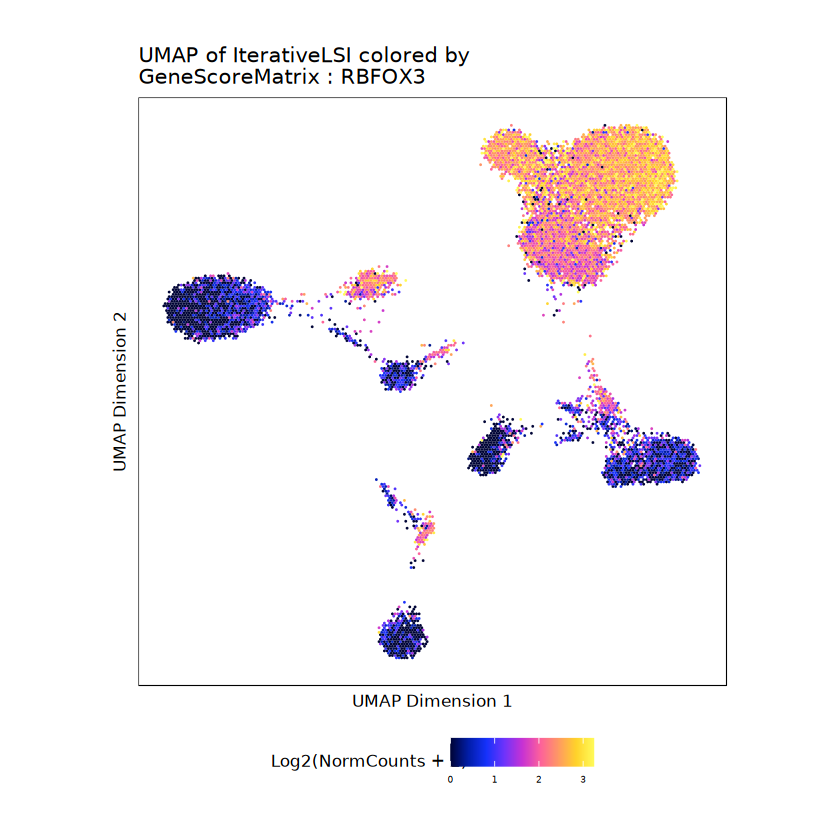

In [11]:
p <- plotEmbedding(
    ArchRProj = mouseBrainArchproj,
    colorBy = "GeneScoreMatrix",
    name = "RBFOX3",
    embedding = "UMAP",
    imputeWeights = NULL
)
p

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1851a2e56c2ed-Date-2024-10-28_Time-22-38-37.592511.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-10-28 22:38:37.778558 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 


Imputing Matrix

Using weights on disk

1 of 5

2 of 5

3 of 5

4 of 5

5 of 5

Using weights on disk

1 of 5

2 of 5

3 of 5

4 of 5

5 of 5

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1851a2e56c2ed-Date-2024-10-28_Time-22-38-37.592511.log



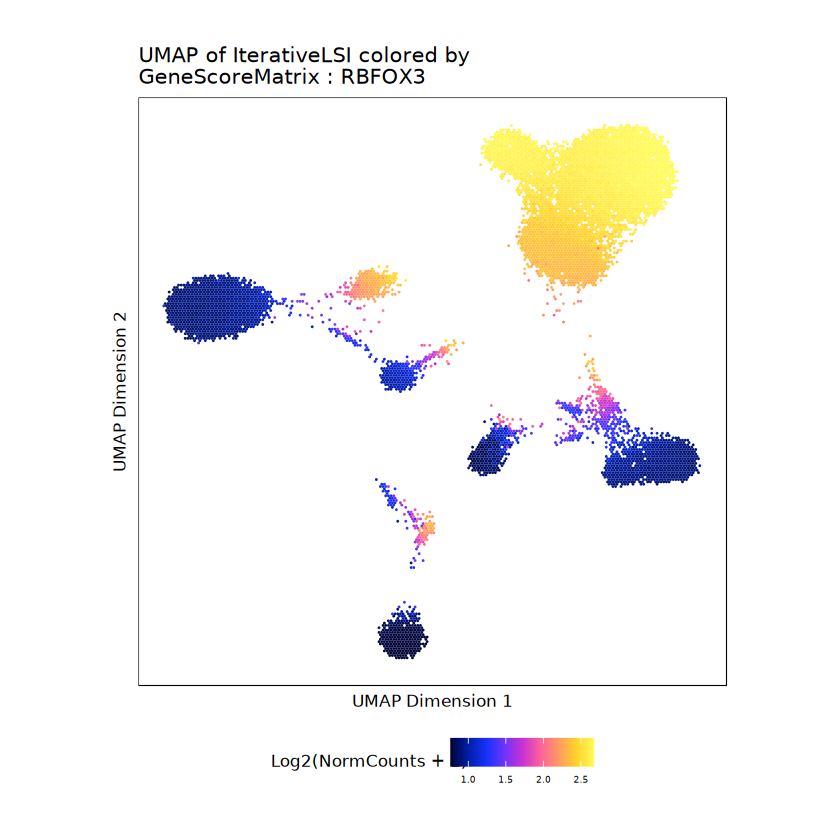

In [12]:
p <- plotEmbedding(
    ArchRProj = mouseBrainArchproj,
    colorBy = "GeneScoreMatrix",
    name = "RBFOX3",
    embedding = "UMAP",
    imputeWeights = getImputeWeights(mouseBrainArchproj)
)
p

## Question 1: Effects of imputation

In [1]:
## Question 1: Considering the gene score plots above, both
##             - without imputed weights (top) and
##             - with imputed weights (bottom),
##             What differences do you see? In other words, what effect does imputation
##             have on the gene score visualization?
##
## Answer:

Imputation smooths out the expression patterns, making gene expression more continuous and less fragmented. In the imputed plot, high-expression regions are clearer and better defined compared to the non-imputed plot, where expression appears patchier and more sparse. Imputation reduces noise and fills in missing values, resulting in a more interpretable visualization of gene expression across clusters.

## Identify major cell populations based on activity scores

### Plotting marker genes

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1851a7471d99f-Date-2024-10-28_Time-22-39-09.374344.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-10-28 22:39:09.563297 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 


Imputing Matrix

Using weights on disk

1 of 5

2 of 5

3 of 5

4 of 5

5 of 5

Using weights on disk

1 of 5

2 of 5

3 of 5

4 of 5

5 of 5

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1851a7471d99f-Date-2024-10-28_Time-22-39-09.374344.log



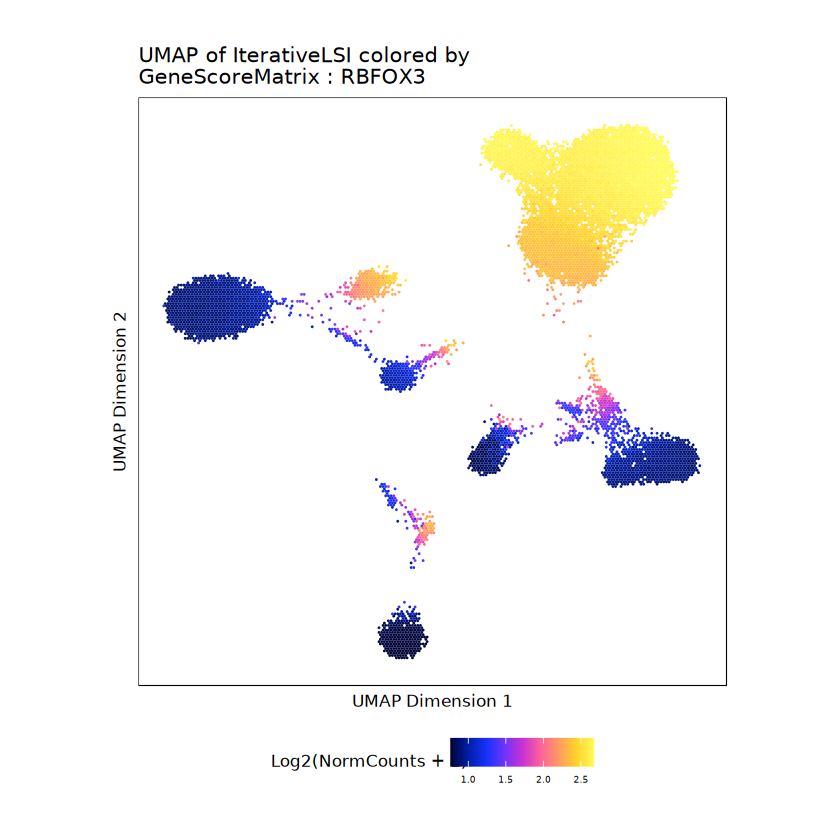

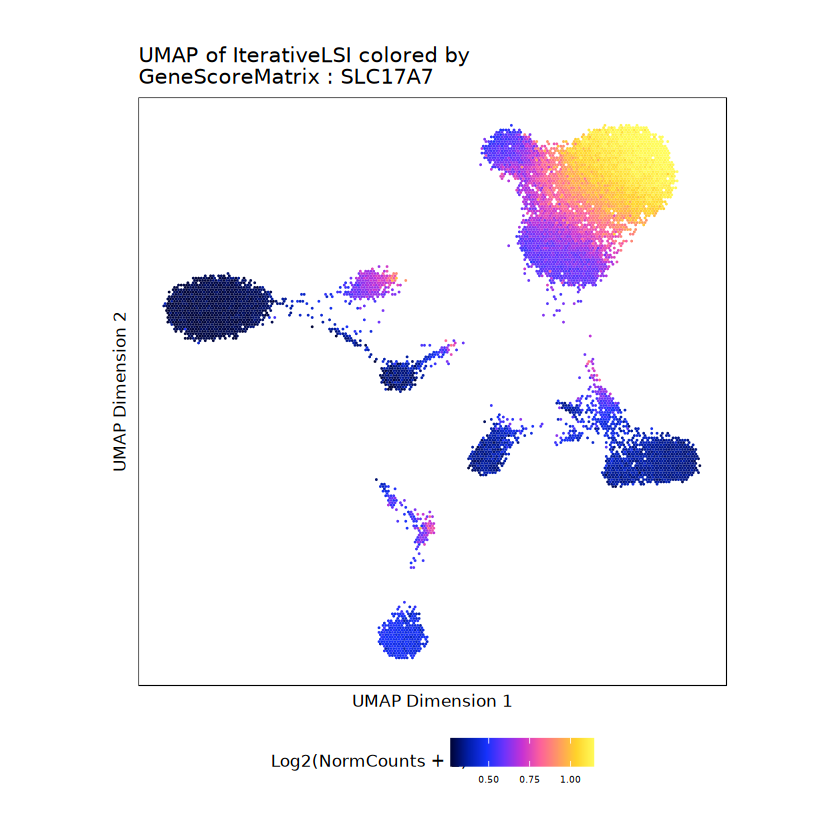

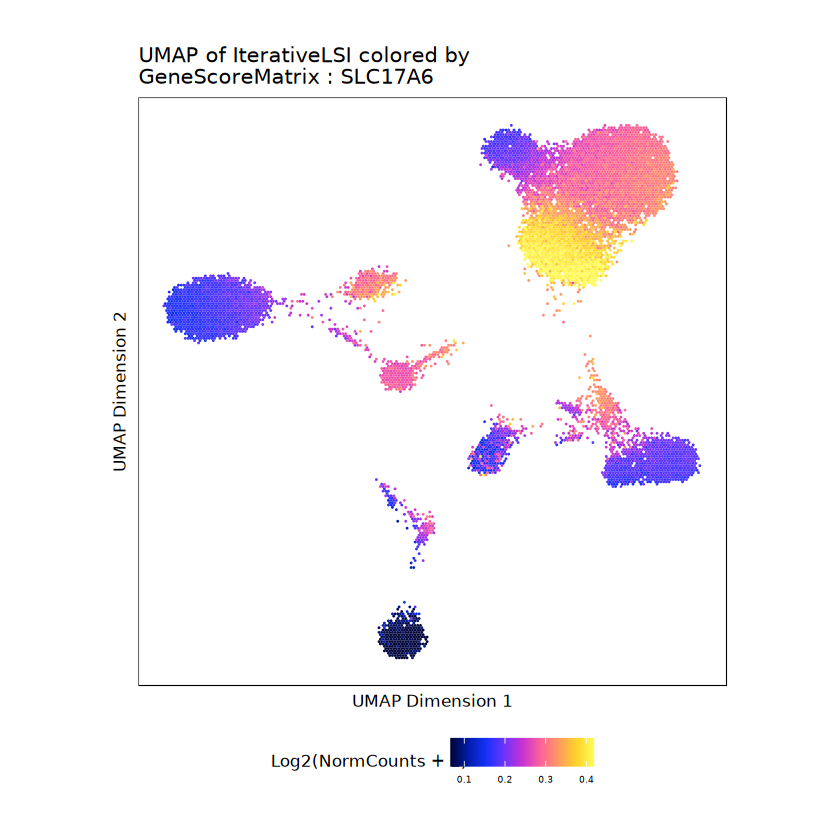

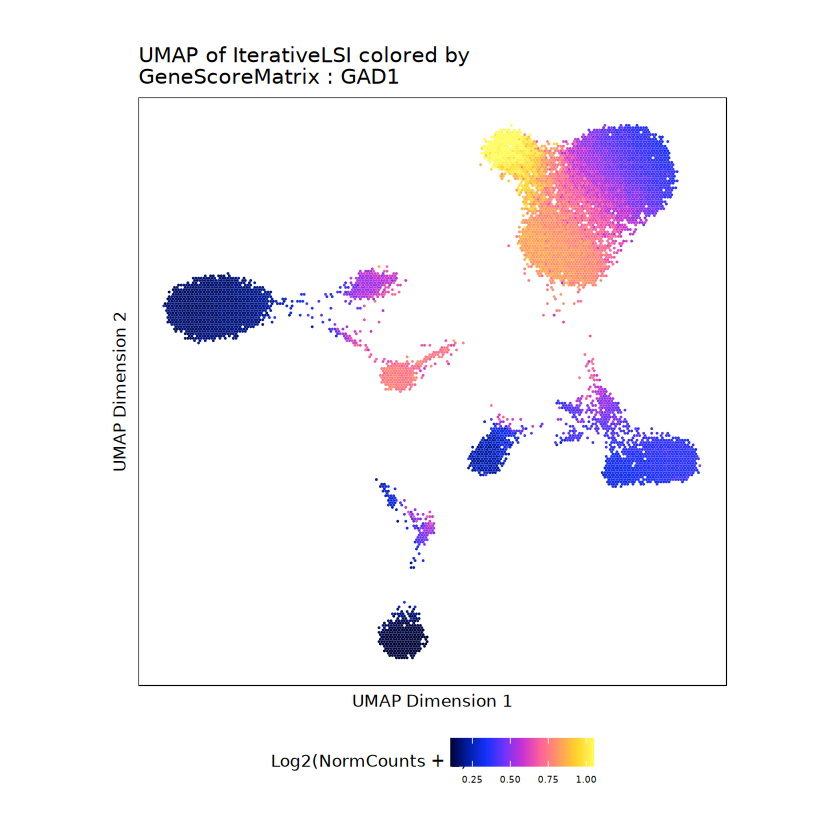

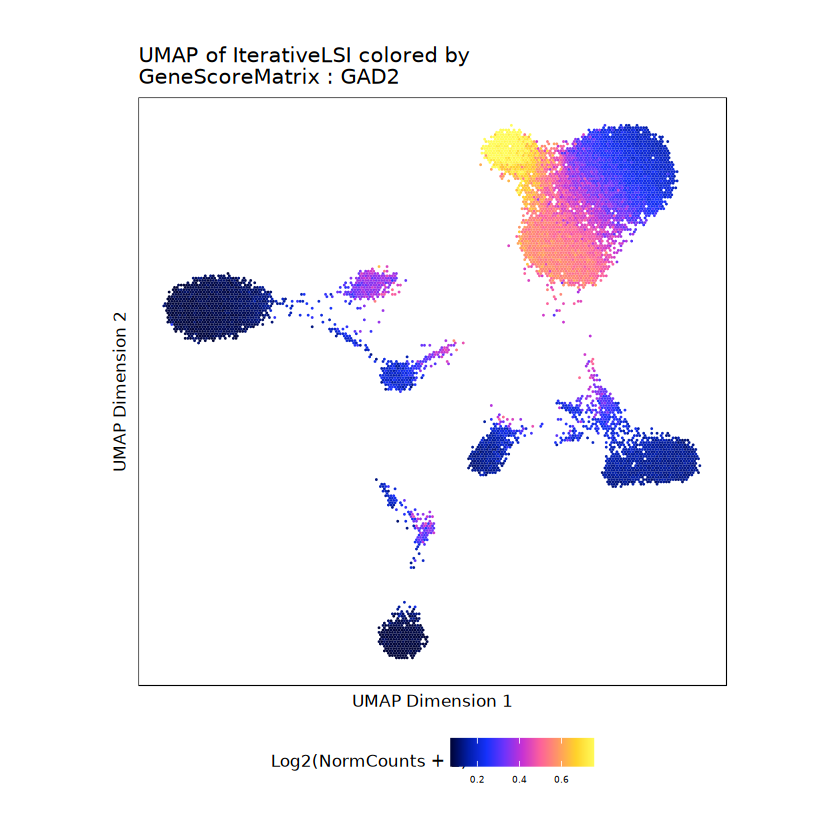

$RBFOX3

$SLC17A7

$SLC17A6

$GAD1

$GAD2

$MOG

$MBP


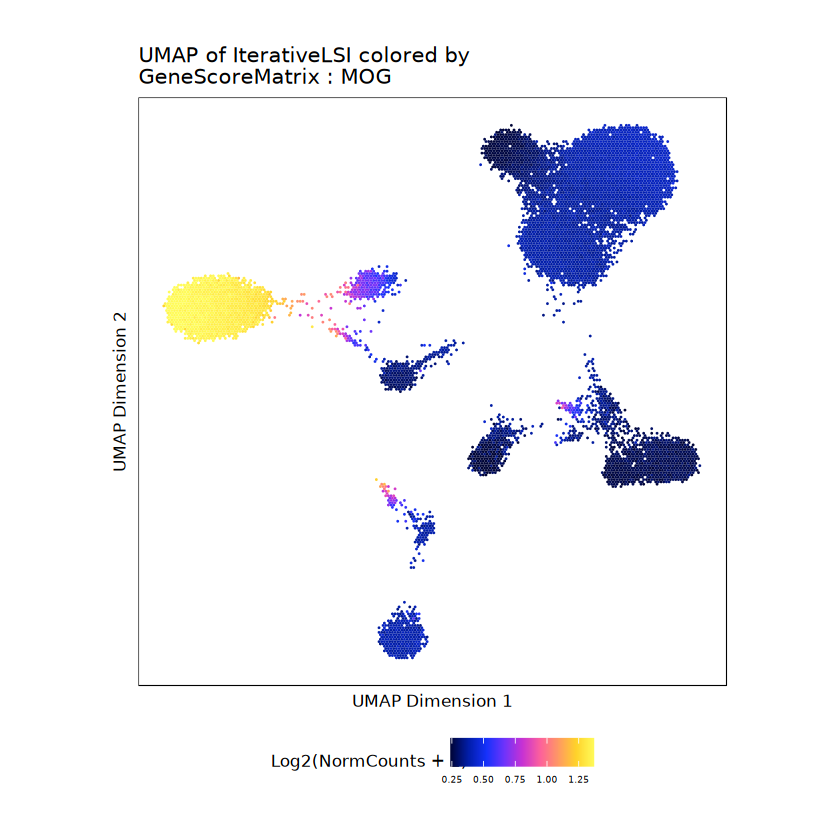

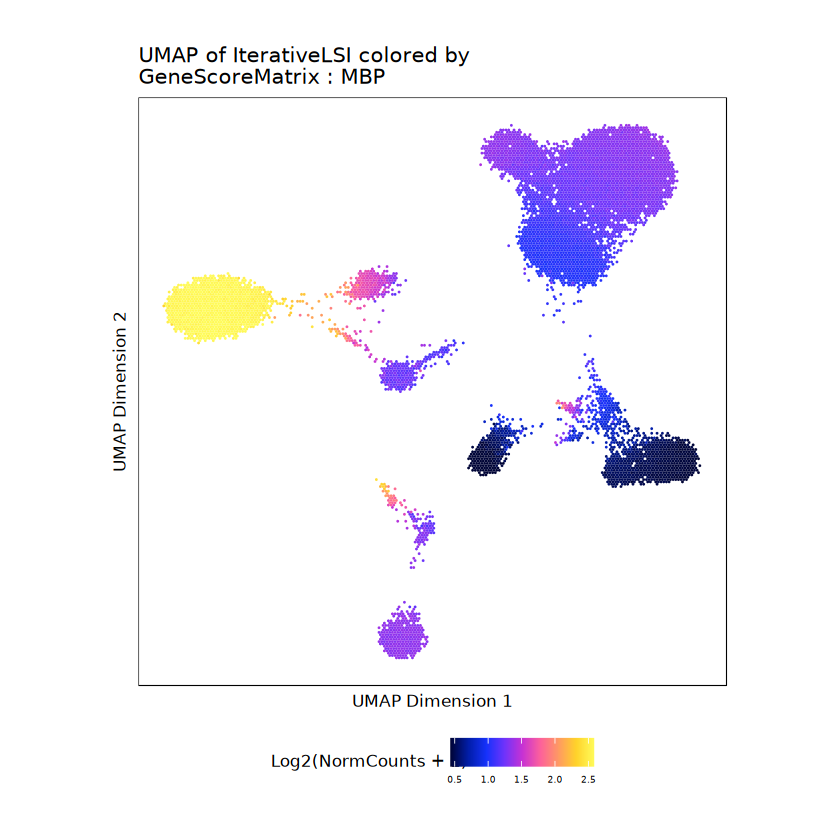

In [14]:
#Plot marker genes for relevant populations

markerGenesV <- c(
    "RBFOX3",  # Neuron
    "SLC17A7", # Excitatory neuron
    "SLC17A6", # Excitatory neuron
    "GAD1",    # Inhibitory neuron
    "GAD2",    # Inhibitory neuron
    "MOG",     # Oligodendrocyte
    "MBP"      # Oligodendrocyte
)

## FYI: Good marker genes to use for neural cell types
# Neuron:	Rbfox3, Snap25
    # excitatory neuron: Slc17a7, Slc17a6
    # inhibitory neuron: Gad1, Gad2
    # medium spiny neuron: Ppp1r1b
# Astrocyte:	Aqp4, Gfap
# Microglia:	Cx3cr1, Itgam, Aif1
# OPC:	Pdgfra, Neu4
# Oligodendrocyte:	Mog, Mbp
# Mural/Meninge:	Anpep, Igfbp2, Slc47a1
# Endothelial:	Cldn5
# Ependymal:	Foxj1, Pifo

p <- plotEmbedding(
    ArchRProj = mouseBrainArchproj,
    colorBy = "GeneScoreMatrix",
    name = markerGenesV,
    embedding = "UMAP",
    imputeWeights = getImputeWeights(mouseBrainArchproj)
)
p

## Question 2: Identify cell populations by gene scores

In [15]:
## Question 2: Based on the gene score plots above, which clusters are likely to be:
##             a. Excitatory neruons
##             b. Inhibitory neurons
##             c. Oligodendrocytes
##             Please give your answer for each group in terms of the cluster numbers visualized
##             under "Clustering and UMAP visualization".
##             Don't forget to consult the list `markerGenesV` to know which marker
##             genes correspond to which cell populations.
##
## Answer:

a. Excitatory neurons:

Marker genes: SLC17A7, SLC17A6

Likely clusters: Clusters 9, 10, and parts of 8, based on the higher expression levels seen in these clusters from the UMAP plots of SLC17A7 and SLC17A6.

----------------

b. Inhibitory neurons:

Marker genes: GAD1, GAD2

Likely clusters: Clusters 7, 13, and 15. These clusters show higher expression of GAD1 and GAD2, which are markers for inhibitory neurons.

----------------

c. Oligodendrocytes:

Marker genes: MOG, MBP

Likely clusters: Clusters 4 and 6. The expression of MOG and MBP, which are oligodendrocyte markers, is highest in these clusters.

## View browser plots

In [16]:
p <- plotBrowserTrack(
    ArchRProj = mouseBrainArchproj,
    groupBy = "Clusters",
    geneSymbol = markerGenesV,
    upstream = 50000,
    downstream = 50000,
    verbose = FALSE
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-1851a380fe556-Date-2024-10-28_Time-22-40-29.058055.log
If there is an issue, please report to github with logFile!



GRanges object with 7 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]    chr11 118489760-118911597      - |       52897      Rbfox3
  [2]     chr7   45163921-45176139      + |       72961     Slc17a7
  [3]     chr7   51621830-51671126      + |      140919     Slc17a6
  [4]     chr2   70562129-70602014      + |       14415        Gad1
  [5]     chr2   22622327-22693877      + |       14417        Gad2
  [6]    chr17   37010740-37023398      - |       17441         Mog
  [7]    chr18   82475123-82585637      + |       17196         Mbp
  -------
  seqinfo: 21 sequences from mm10 genome


Getting Region From Arrow Files 1 of 10

Getting Region From Arrow Files 2 of 10

Getting Region From Arrow Files 3 of 10

Getting Region From Arrow Files 4 of 10

Getting Region From Arrow Files 5 of 10

Getting Region From Arrow Files 6 of 10

Getting Region From Arrow Files 7 of 10

Getting Region From Arrow Files 8 of 10

Getting Region From Arrow Files 9 of 10

Getting Region From Arrow Files 10 of 10

Getting Region From Arrow Files 1 of 10

Getting Region From Arrow Files 2 of 10

Getting Region From Arrow Files 3 of 10

Getting Region From Arrow Files 4 of 10

Getting Region From Arrow Files 5 of 10

Getting Region From Arrow Files 6 of 10

Getting Region From Arrow Files 7 of 10

Getting Region From Arrow Files 8 of 10

Getting Region From Arrow Files 9 of 10

Getting Region From Arrow Files 10 of 10

Getting Region From Arrow Files 1 of 10

Getting Region From Arrow Files 2 of 10

Getting Region From Arrow Files 3 of 10

Getting Region From Arrow Files 4 of 10

Getting Region

## Question 3: Interpreting browser plots

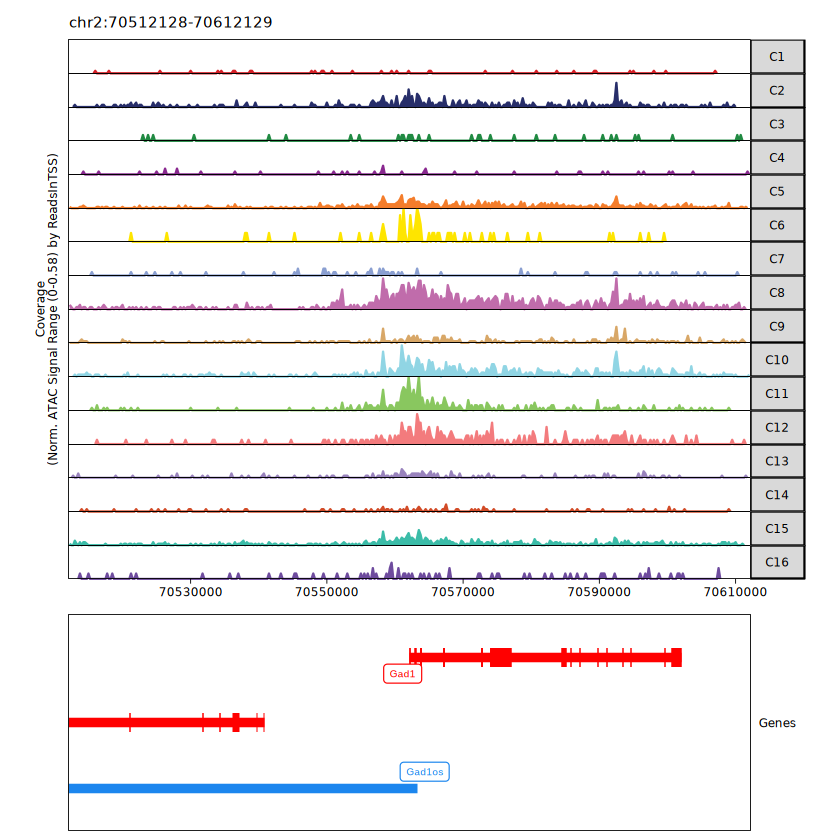

In [17]:
grid::grid.newpage()
grid::grid.draw(p$Gad1)

In [18]:
## Question 3:
## Part 1: Considering the browser plot above, why do you think that Cluster 8 has a high estimated gene score for Gad1?
##
## Answer:

The browser plot shows that Cluster 8 has a high level of ATAC-seq signal at the genomic region corresponding to the Gad1 gene. This suggests that the chromatin is highly accessible in this region for cells in Cluster 8, indicating active transcription or regulatory activity related to Gad1. Since Gad1 is a marker for inhibitory neurons, this likely reflects that Cluster 8 contains a significant proportion of inhibitory neurons, which express Gad1. Therefore, the high accessibility of this region correlates with a high gene score for Gad1 in Cluster 8.

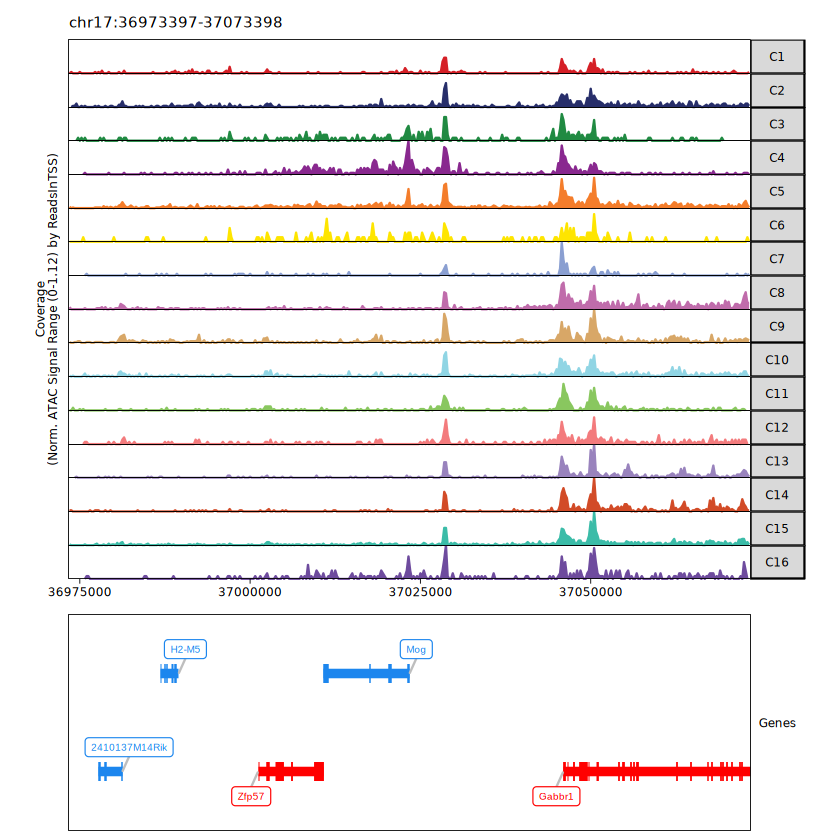

In [19]:
grid::grid.draw(p$Mog)

In [20]:
## Part 2: Considering the browser plot above, why do you think that Cluster 4 has
##         a higher estimated gene score for MOG than Cluster 5 does?
##
## Answer:

In the browser plot for the MOG gene, we can observe that Cluster 4 has a higher and more defined ATAC-seq signal (chromatin accessibility) over the MOG gene locus compared to Cluster 5. The peaks in Cluster 4 are sharper and more numerous, indicating active regulatory elements and likely higher transcriptional activity of MOG in this cluster. This suggests that Cluster 4 contains more cells expressing MOG, which is a marker for oligodendrocytes.

On the other hand, Cluster 5 has lower or flatter signal peaks, implying less chromatin accessibility and thus less transcriptional activity of MOG. This could indicate that fewer oligodendrocytes or less active MOG transcription is present in Cluster 5, leading to a lower estimated gene score compared to Cluster 4.

## Fragment length periodicity

## Question 4: Fragment length quality control

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

ArchR logging to : ArchRLogs/ArchR-plotFragmentSizes-1851afed89a4-Date-2024-10-28_Time-22-42-17.389689.log
If there is an issue, please report to github with logFile!

2024-10-28 22:42:17.506322 : Multiome_Mouse_Brain_Alzheimers_8 Computing FragmentSizes (1 of 1)!, 0.002 mins elapsed.

2024-10-28 22:42:53.680403 : Multiome_Mouse_Brain_Alzheimers_8 Finished Computing FragmentSizes (1 of 1)!, 0.605 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotFragmentSizes-1851afed89a4-Date-2024-10-28_Time-22-42-17.389689.log

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

ArchR logging to : ArchRLogs/ArchR-plotFragmentSizes-1851a2d37587a-Date-2024-10-28_Time-22-42-53.896837.log
If there is an issue, please report to github with logFile!

2024-10-28 22:42:54.005115 : Multiome_Mouse_Brain_Alzheimers_9 Computing FragmentSizes (1 of 1)!, 0.002 min

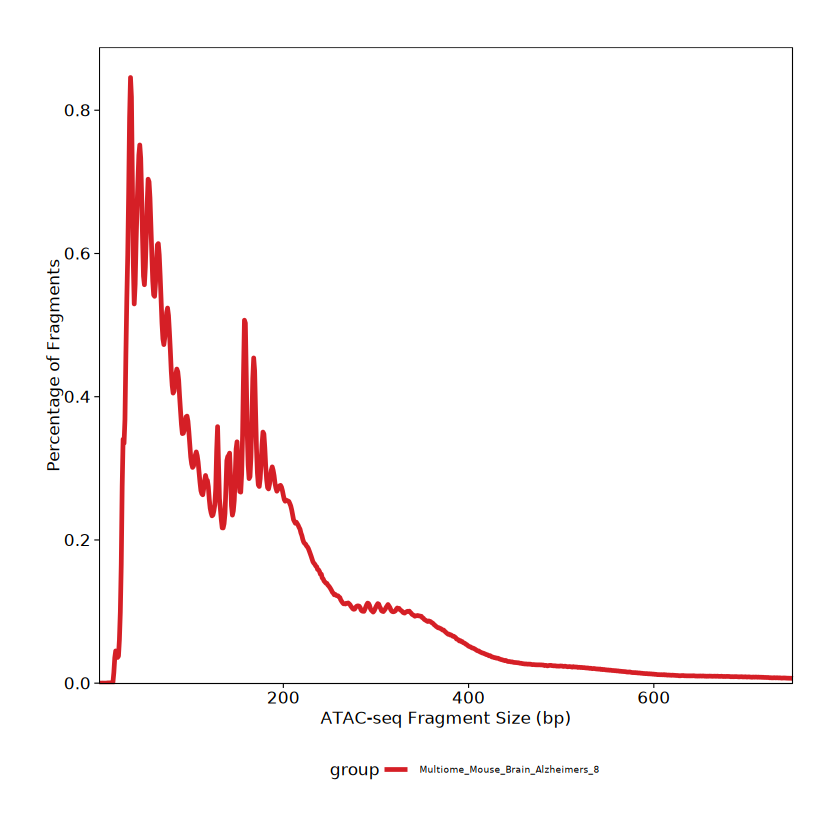

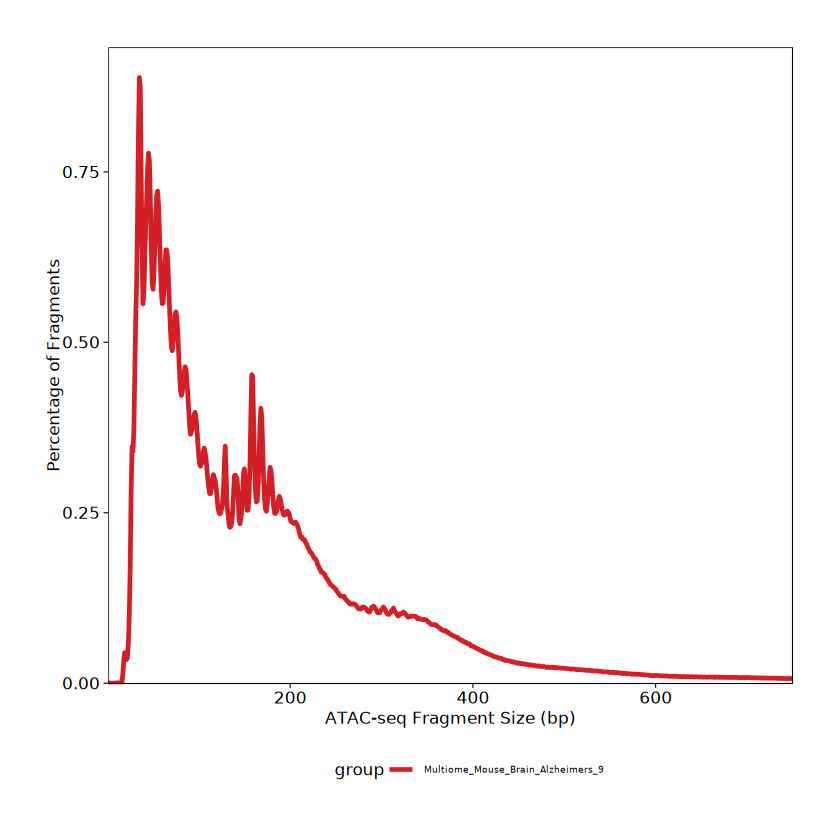

In [21]:
# Select only the cells from sample 8
idxSample <- BiocGenerics::which(mouseBrainArchproj$Sample %in% "Multiome_Mouse_Brain_Alzheimers_8")
cellsSample <- mouseBrainArchproj$cellNames[idxSample]
plotFragmentSizes(ArchRProj = mouseBrainArchproj[cellsSample, ])

# Select only the cells from sample 9
idxSample <- BiocGenerics::which(mouseBrainArchproj$Sample %in% "Multiome_Mouse_Brain_Alzheimers_9")
cellsSample <- mouseBrainArchproj$cellNames[idxSample]
plotFragmentSizes(ArchRProj = mouseBrainArchproj[cellsSample, ])

In [22]:
## Question 4: Compare the fragment length periodicity plots above for samples 8 (top) and 9 (bottom).
##             Using these plots, how can you tell that sample 9 is (slightly) lower quality than sample 8?
##
## Answer:

The fragment length periodicity plots for samples 8 and 9 show differences in their overall quality. In high-quality ATAC-seq data, we expect to see distinct periodic peaks corresponding to nucleosomal structures, with a prominent mononucleosome peak at around 150 bp, followed by dinucleosome and trinucleosome peaks at approximately 300 bp and 450 bp, respectively. For sample 8, these periodic peaks are clearly visible and well-defined, indicating high-quality data with preserved nucleosomal structures. In contrast, the plot for sample 9 shows a similar pattern but with less distinct and sharp peaks, especially beyond the mononucleosome peak. The diminished clarity of the periodic peaks in sample 9 suggests a slight degradation or lower preservation of nucleosomal structures, making it of slightly lower quality than sample 8. This reduced quality may affect the reliability of chromatin accessibility analysis for sample 9.

## TSS Enrichment

## Question 5: TSS Enrichment quality control

1 




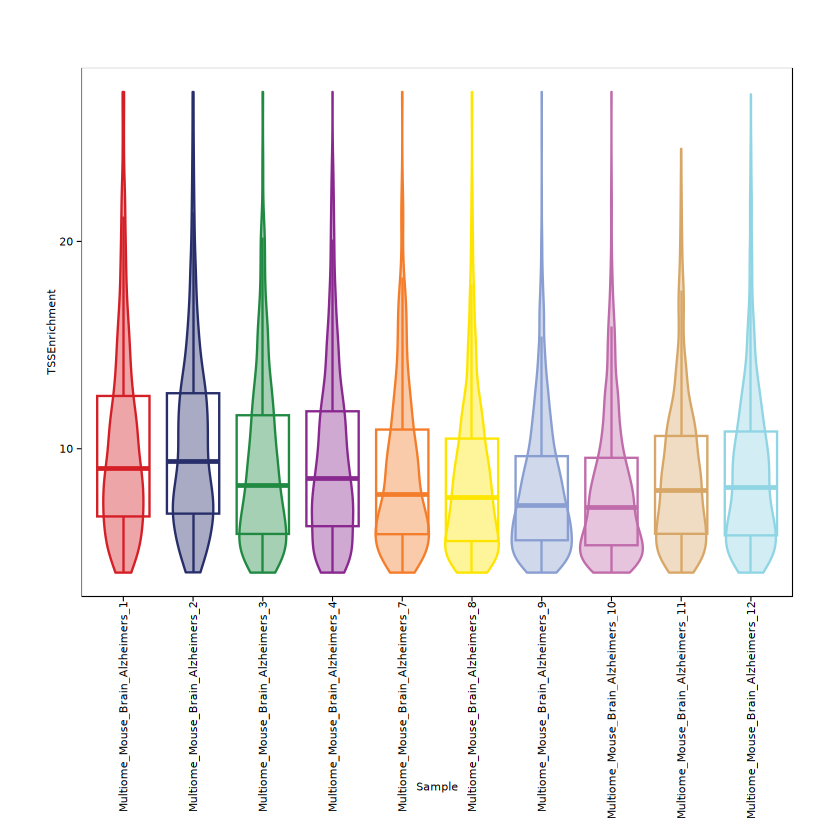

In [24]:
p2 <- plotGroups(
    ArchRProj = mouseBrainArchproj,
    groupBy = "Sample",
    colorBy = "cellColData",
    name = "TSSEnrichment",
    plotAs = "violin",
    alpha = 0.4,
    addBoxPlot = TRUE
   )
p2

In [ ]:
## Question 5: Consider the TSS enrichment per-sample plot above.
##             From the plot, how can you tell that samples 9 and 10 are
##             (slightly) lower quality compared to the rest of the dataset?
##
## Answer:

From the TSS enrichment plot, we can observe that samples 9 and 10 exhibit lower TSS enrichment values compared to the other samples. Specifically, the median TSS enrichment for these samples is slightly lower, and their distributions show fewer high TSS enrichment values, which are generally indicative of high-quality ATAC-seq data. TSS enrichment reflects the accessibility of transcription start sites, and lower values often indicate lower data quality, as these regions should be more accessible in high-quality chromatin datasets. The relatively compressed range of TSS enrichment in samples 9 and 10 further suggests that they may have less distinct and accessible chromatin around TSS regions, contributing to their slightly lower quality compared to the other samples in the dataset.